In [19]:
import numpy as np
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, array_to_latex
from math import sqrt, pi
from IPython.display import display, Math


In [8]:
#CSWAP operation (order is inverted because of qiskit's system, the circuit gate is still the same)
qc_cswap = QuantumCircuit(3)
qc_cswap.cx(0,1)
qc_cswap.ccx(2,1,0)
qc_cswap.cx(0,1)
print(qc_cswap.draw())
usim = Aer.get_backend('aer_simulator')
qc_cswap.save_unitary()
qobj = assemble(qc_cswap)
unitary = usim.run(qobj).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{Circuit = }\n"))

          ┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘  │  └───┘
q_2: ───────■───────
                    


<IPython.core.display.Latex object>

In [11]:
#The inner product is estimated by the probability of measuring 0 from the ancilla qubit. The probability of measuring 
#a 0 can be calculated to be (1 + (inner product)**2)/2 , therefore, by running the experiment a sufficiently large
#number of times, you can get the square of the inner product. Determining the sign should be possible by inspection,
#so you''ll have a value for the inner product with sign.

SyntaxError: invalid syntax (2880389410.py, line 1)

In [43]:
qc_qswap = QuantumCircuit(3,1)
qc_qswap.initialize([1,0], 2)
qc_qswap.initialize([3/5,4/5], 1)
qc_qswap.initialize([-3/5,4/5], 0)
qc_qswap.h(2)
qc_qswap.cx(0,1)
qc_qswap.ccx(2,1,0)
qc_qswap.cx(0,1)
qc_qswap.h(2)
qc_qswap.measure(2,0)
print(qc_qswap.draw())

     ┌──────────────────────┐     ┌───┐        
q_0: ┤ Initialize(-0.6,0.8) ├──■──┤ X ├──■─────
     ├─────────────────────┬┘┌─┴─┐└─┬─┘┌─┴─┐   
q_1: ┤ Initialize(0.6,0.8) ├─┤ X ├──■──┤ X ├───
     └─┬─────────────────┬─┘ ├───┤  │  ├───┤┌─┐
q_2: ──┤ Initialize(1,0) ├───┤ H ├──■──┤ H ├┤M├
       └─────────────────┘   └───┘     └───┘└╥┘
c: 1/════════════════════════════════════════╩═
                                             0 


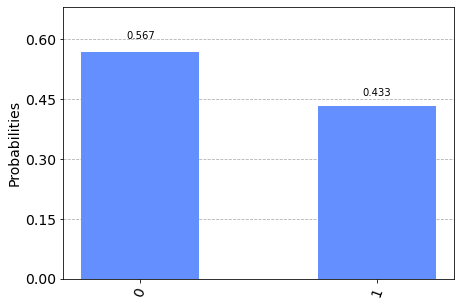

In [44]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_qswap).result()
counts = result.get_counts()
plot_histogram(counts)

{'0': 564, '1': 460}
{'0': 523, '1': 501}
{'0': 545, '1': 479}
{'1': 492, '0': 532}
{'1': 476, '0': 548}
{'1': 484, '0': 540}
{'1': 462, '0': 562}
{'1': 458, '0': 566}
{'0': 547, '1': 477}
{'0': 521, '1': 503}
{'0': 552, '1': 472}
{'0': 525, '1': 499}
{'0': 562, '1': 462}
{'0': 568, '1': 456}
{'1': 486, '0': 538}
{'1': 448, '0': 576}
{'1': 446, '0': 578}
{'0': 581, '1': 443}
{'0': 580, '1': 444}
{'1': 503, '0': 521}
{'1': 485, '0': 539}
{'1': 493, '0': 531}
{'1': 489, '0': 535}
{'0': 559, '1': 465}
{'0': 542, '1': 482}
{'0': 547, '1': 477}
{'0': 563, '1': 461}
{'1': 491, '0': 533}
{'0': 544, '1': 480}
{'0': 561, '1': 463}
{'1': 464, '0': 560}
{'0': 572, '1': 452}
{'1': 467, '0': 557}
{'1': 446, '0': 578}
{'1': 458, '0': 566}
{'0': 549, '1': 475}
{'1': 477, '0': 547}
{'1': 449, '0': 575}
{'0': 563, '1': 461}
{'1': 471, '0': 553}
{'1': 456, '0': 568}
{'1': 460, '0': 564}
{'0': 561, '1': 463}
{'0': 578, '1': 446}
{'1': 454, '0': 570}
{'0': 567, '1': 457}
{'0': 540, '1': 484}
{'0': 567, '1

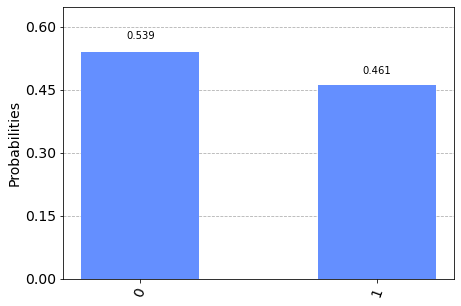

In [48]:
sim = Aer.get_backend('aer_simulator') 
tot_zero = 0
tot_one = 0
for i in range(100):
    result = sim.run(qc_qswap).result()
    counts = result.get_counts()
    print(counts)
    tot_zero+= counts['0']
    tot_one+= counts['1']
print(tot_zero,tot_one)
counts = {'0':tot_zero,'1':tot_one}
a = (tot_zero - tot_one)/(tot_zero + tot_one)
if a<0 : 
    a = 0
a = np.sqrt(a)
print("Inner product = ",a)
print(counts)
plot_histogram(counts)

In [ ]:
#Measuring in the bell basis gives the inner product directly in terms of the probability of obtaining the state 
#(|00>+|11>)/sqrt(2), more accurately, the probability of getting that bell state is half of the square of the inner
#product. To measure in the bell basis, the following circuit can be applied.

In [66]:
qswap_bell = QuantumCircuit(2)
qswap_bell.initialize([3/5,4/5], 1)
qswap_bell.initialize([-3/5,4/5], 0)
qswap_bell.cx(1,0)
qswap_bell.h(1)
qswap_bell.measure_all()
print(qswap_bell.draw())

        ┌──────────────────────┐┌───┐      ░ ┌─┐   
   q_0: ┤ Initialize(-0.6,0.8) ├┤ X ├──────░─┤M├───
        ├─────────────────────┬┘└─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ Initialize(0.6,0.8) ├───■──┤ H ├─░──╫─┤M├
        └─────────────────────┘      └───┘ ░  ║ └╥┘
meas: 2/══════════════════════════════════════╩══╩═
                                              0  1 


{'00': 38, '11': 454, '10': 532}
0.27568097504180444


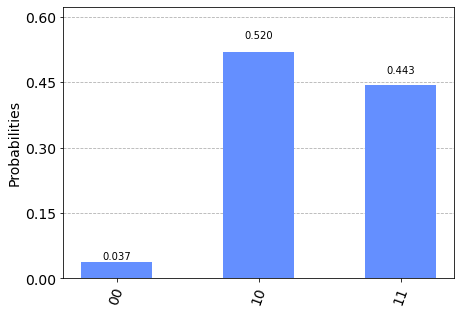

In [69]:
qsim = Aer.get_backend('aer_simulator') 
result = qsim.run(qswap_bell).result()
counts = result.get_counts()
print(counts)
print(np.sqrt(2*(counts['00'])/1000))
plot_histogram(counts)